In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_IND = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer',
 'Senior Data Engineer']

In [5]:
df_IND_top6 = df_DA_IND[df_DA_IND['job_title_short'].isin(job_titles)]

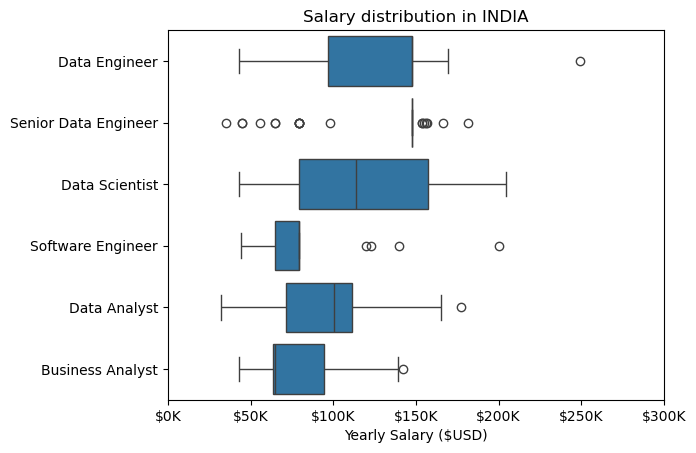

In [6]:
sns.boxplot(data=df_IND_top6 , x = 'salary_year_avg' , y = 'job_title_short')

plt.title('Salary distribution in INDIA')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()

In [7]:
#have to sort the yaxis by median salary
job_order = df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Software Engineer', 'Business Analyst'],
      dtype='object', name='job_title_short')

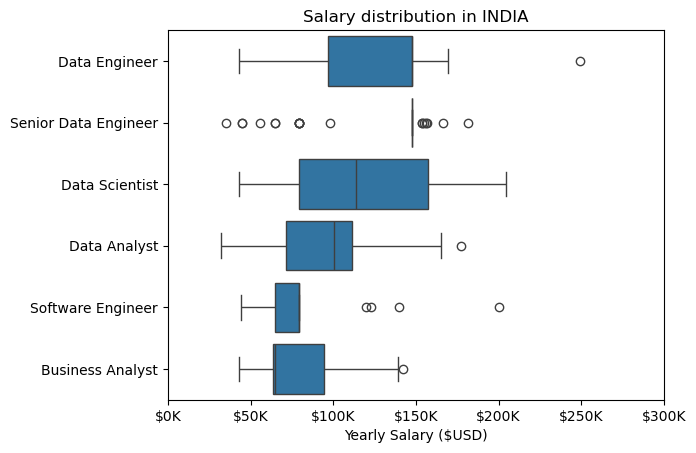

In [8]:
sns.boxplot(data=df_IND_top6 , x = 'salary_year_avg' , y = 'job_title_short' , order=job_order)

plt.title('Salary distribution in INDIA')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()

In [15]:
df_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_IND = df_IND.dropna(subset=['salary_year_avg'])

In [16]:
df_IND = df_IND.explode('job_skills')

In [17]:
df_IND[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [18]:
df_IND_top_pay = df_IND.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_IND_top_pay =df_IND_top_pay.head(10)
df_IND_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [19]:
df_IND_skills = df_IND.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_IND_skills =df_IND_skills.head(10).sort_values(by='median',ascending=False)
df_IND_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


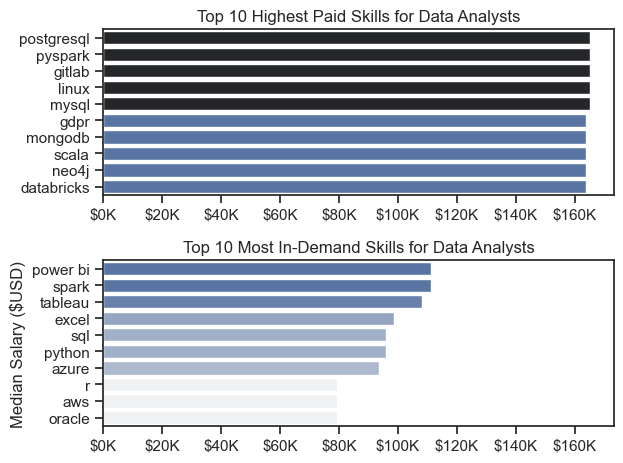

In [20]:
fig , ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data=df_IND_top_pay , x = 'median' , y = df_IND_top_pay.index , ax=ax[0], hue = 'median' , palette = "dark:b_r")
ax[0].legend().remove()

# df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

# df_DA_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_IND_skills , x = 'median' , y = df_IND_skills.index , ax=ax[1] ,  hue = 'median' , palette = "light:b")
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()